In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_excel("C:/Users/Nishi/Desktop/excelR/assignments/Forecasting/Airlines+Data.xlsx")
print(data)
print ('\n Data Types:')
print (data.dtypes)

        Month  Passengers   t
0  1995-01-01         112   1
1  1995-02-01         118   2
2  1995-03-01         132   3
3  1995-04-01         129   4
4  1995-05-01         121   5
..        ...         ...  ..
91 2002-08-01         405  92
92 2002-09-01         355  93
93 2002-10-01         306  94
94 2002-11-01         271  95
95 2002-12-01         306  96

[96 rows x 3 columns]

 Data Types:
Month         datetime64[ns]
Passengers             int64
t                      int64
dtype: object


In [3]:
data["Date"] = pd.to_datetime(data.Month,format="%Y-%b-%d")
#look for c standard format codes

# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

#data["year"] = data.Date.dt.strftime("%Y") # month extraction
#data["month"] = data.Date.dt.strftime("%b") # year extraction
#data["day"] = data.Date.dt.strftime("%d") # month extraction
data

,Month,Passengers,t,Date
0,1995-01-01,112,1,1995-01-01
1,1995-02-01,118,2,1995-02-01
2,1995-03-01,132,3,1995-03-01
3,1995-04-01,129,4,1995-04-01
4,1995-05-01,121,5,1995-05-01
...,...,...,...,...
91,2002-08-01,405,92,2002-08-01
92,2002-09-01,355,93,2002-09-01
93,2002-10-01,306,94,2002-10-01
94,2002-11-01,271,95,2002-11-01


In [4]:
data.set_index('Date', inplace=True) #set date as index
data.head()

,Month,Passengers,t
Date,,,
1995-01-01,1995-01-01,112,1
1995-02-01,1995-02-01,118,2
1995-03-01,1995-03-01,132,3
1995-04-01,1995-04-01,129,4
1995-05-01,1995-05-01,121,5


In [6]:
data=data.drop(columns=['Month','t'])

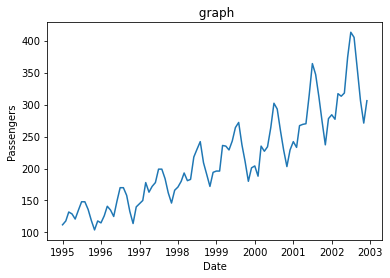

In [8]:
#Visualizing data
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.title(" graph")
plt.plot(data)

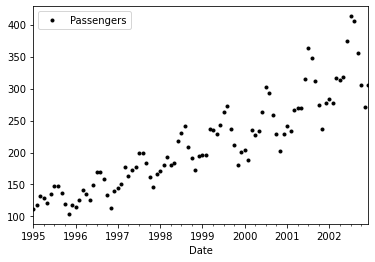

In [9]:
data.plot(style='k.')
plt.show()

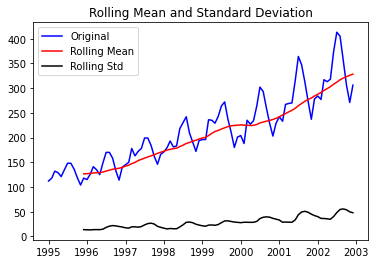

Results of dickey fuller test
Test Statistics                 1.340248
p-value                         0.996825
No. of lags used               12.000000
Number of observations used    83.000000
critical value (1%)            -3.511712
critical value (5%)            -2.897048
critical value (10%)           -2.585713
dtype: float64


In [10]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['Passengers'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(data)

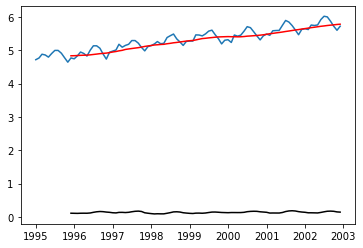

In [11]:
data_log = np.log(data)
moving_avg = data_log.rolling(12).mean()
std_dev = data_log.rolling(12).std()
plt.plot(data_log)
plt.plot(moving_avg, color="red")
plt.plot(std_dev, color ="black")
plt.show()

In [12]:
data_log_moving_avg_diff = data_log-moving_avg
data_log_moving_avg_diff.dropna(inplace=True)

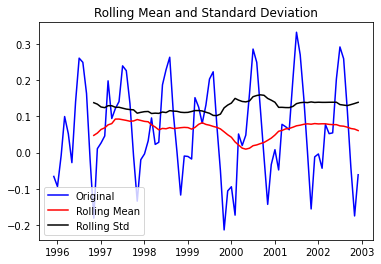

Results of dickey fuller test
Test Statistics                -1.910930
p-value                         0.326937
No. of lags used               12.000000
Number of observations used    72.000000
critical value (1%)            -3.524624
critical value (5%)            -2.902607
critical value (10%)           -2.588679
dtype: float64


In [13]:
test_stationarity(data_log_moving_avg_diff)

In [14]:
weighted_average = data_log.ewm(halflife=12, min_periods=0,adjust=True).mean()


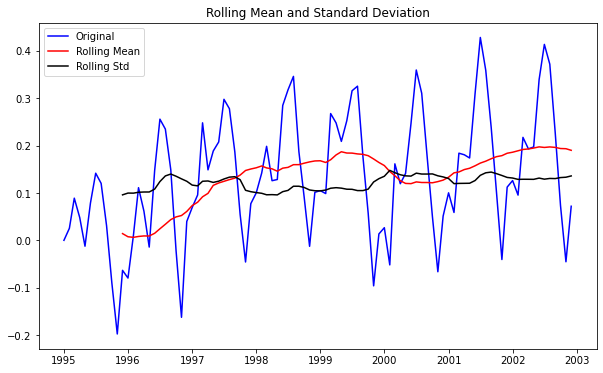

Results of dickey fuller test
Test Statistics                -2.835036
p-value                         0.053441
No. of lags used               12.000000
Number of observations used    83.000000
critical value (1%)            -3.511712
critical value (5%)            -2.897048
critical value (10%)           -2.585713
dtype: float64


In [15]:
logScale_weightedMean = data_log-weighted_average
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
test_stationarity(logScale_weightedMean)


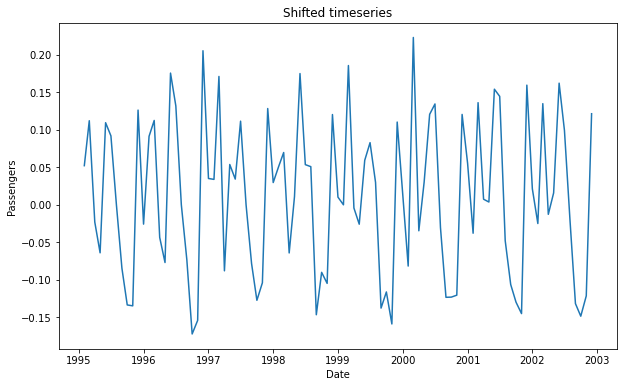

In [16]:
data_log_diff = data_log - data_log.shift()
plt.title("Shifted timeseries")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.plot(data_log_diff)#Let us test the stationarity of our resultant series
#data_log_diff.dropna(inplace=True)test_stationarity(data_log_diff)


<ipython-input-17-3f45c3a4cdbe>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(data_log, model='additive', freq = 12)


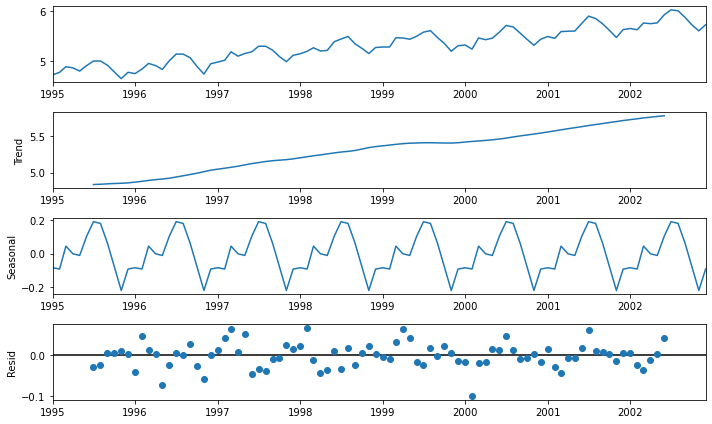

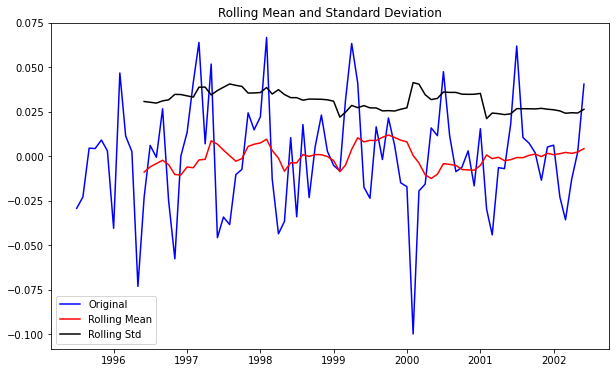

Results of dickey fuller test


KeyError: 'Passengers'

In [17]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_log, model='additive', freq = 12)
result.plot()
plt.show()
trend = result.trend
trend.dropna(inplace=True)
seasonality = result.seasonal
seasonality.dropna(inplace=True)
residual = result.resid
residual.dropna(inplace=True)
test_stationarity(residual)


In [18]:
data

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


C:\Users\Nishi\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


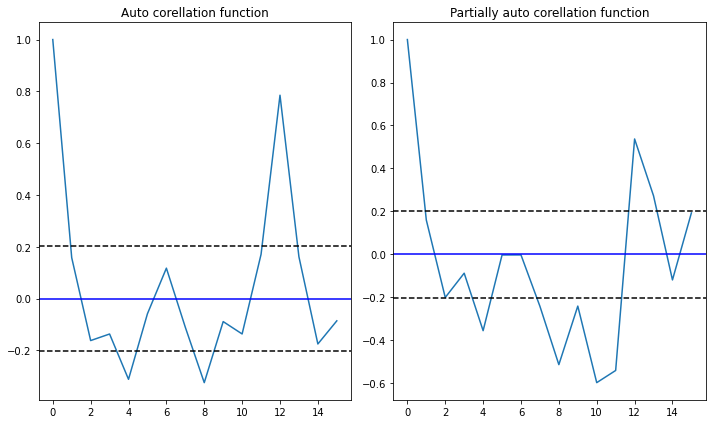

In [27]:
from statsmodels.tsa.stattools import acf,pacf
# we use d value here(data_log_shift)
acf = acf(data2_log_diff, nlags=15)
pacf= pacf(data2_log_diff, nlags=15,method='ols')#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(data2_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(data2_log_diff)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(data2_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(data2_log_diff)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()


In [26]:
data2_log_diff =data_log_diff.dropna()

C:\Users\Nishi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Nishi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

RSS : 0.693124


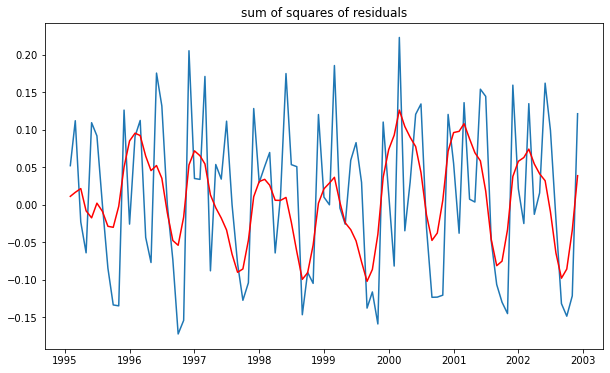

In [44]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data_log, order=(2,1,2))
result_AR = model.fit(disp = 0)
plt.plot(data2_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_AR.fittedvalues-data2_log_diff["Passengers"])**2))

In [ ]:
#Less the RSS value, the more effective the model issince got the least value for order(2,1,2)

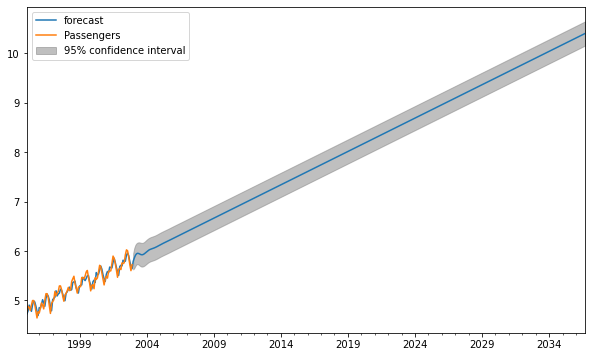

In [33]:
result_AR.plot_predict(1,500)
x=result_AR.forecast(steps=200)

In [43]:
# MA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ARIMA(data, order=(0, 0, 1))
model_fit = model.fit()
# make prediction
MA = model_fit.predict(len(data), len(data))
print(MA)

[72.26277995]


In [53]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = SARIMAX(data, order=(0, 1, 0), seasonal_order=(0, 1, 0, 12))
model_fit = model.fit(disp=False)
# make prediction
SARIMA = model_fit.predict(len(data), len(data))
print(SARIMA)


[100.40899876]
